In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Before: ', test.columns)
test.columns = test.columns.str.lower()
print('After: ', test.columns)

Before:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After:  Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [4]:
print('Before: ', train.columns)
train.columns = train.columns.str.lower()
print('After: ', train.columns)

Before:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After:  Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passenger

## Features explanation:

| Variable   |      Definition      |  Key |
|----------|:-------------:|------|
| survival |  Survival | 0 = No, 1 = Yes |
| pclass |    Ticket class   |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| age | age in years | | 
| sibsp	| # of siblings / spouses aboard the Titanic | |	
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |	
| cabin	| Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


### Numerical features:

**Continous**: Age, Fare. **Discrete**: SibSp, Parch,


### Categorical features:

**Categorical**: Survived, Sex, and Embarked. **Ordinal**: Pclass.


### Other features

**Text**: name, cabin, ticket. **Incremental**: Passangerid



We have 3 columns with missing data:

* Age
* Cabin
* Embarked


In [6]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",male,347082,B96 B98,S
freq,1,577,7,4,644


### 5Cs analisis:

**Correlating.**
**Completing.**
**Correcting.**
**Creating.**
**Classifying.**

## Correlating

we will try to correlate the features with the objetive

In [8]:
train[['sex','survived']].groupby('sex', as_index = False).agg(np.mean).sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [9]:
train[['pclass','survived']].groupby('pclass', as_index=False).agg(np.mean).sort_values('survived', ascending = False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[['embarked','survived']].groupby('embarked', as_index=False).agg(np.mean).sort_values('survived', ascending = False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
train[['sibsp','survived']].groupby('sibsp', as_index=False).agg(np.mean).sort_values('survived', ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
pd.pivot_table(train, 'survived', 'parch', aggfunc=np.mean).sort_values(by='survived', ascending=False)

,survived
parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


**Conclusions of correlation**

* As we expected, womans and fist class would have more chances to survive
* Having sibiligns or parents have certain correlation survive. So we can build a feature to determinate if you where there with your family. 
* Lastly, been embarked by some dock could be correlated to the class, and thus the reason why the survival rate increase for certain dock station.

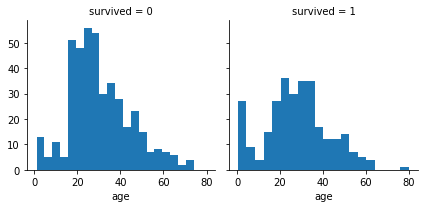

In [13]:
g = sns.FacetGrid(train, col='survived')
g.map(plt.hist, 'age', bins=20)

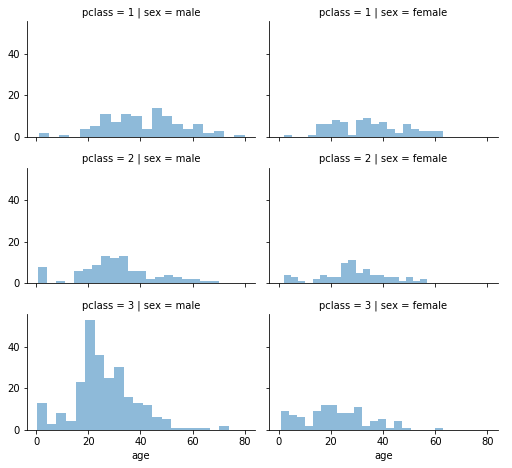

In [14]:
grid = sns.FacetGrid(train, row='pclass', col='sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\campa\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\campa\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


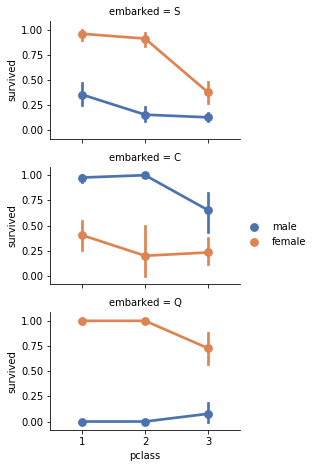

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

C:\Users\campa\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


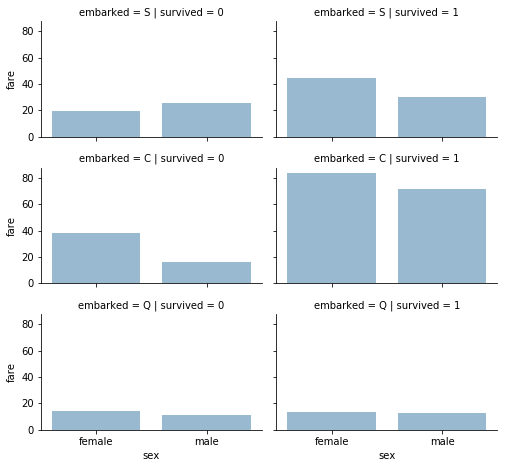

In [16]:
grid = sns.FacetGrid(train, row='embarked', col='survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=0.5, ci=None)
grid.add_legend()

## Completing #1 - Cabin


The cabin is the feature with less info, lets check a few things:

* Distribution for each cabin 
* Median fare for each cabin
* Relation cabin sibsp and parch

In [17]:
cabin_mask = train['cabin'].notnull()
train['cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
E77            1
D10 D12        1
E38            1
A36            1
A26            1
Name: cabin, Length: 147, dtype: int64

In [18]:
# train[cabin_mask].hist()

In [19]:
train[cabin_mask]['pclass'].value_counts()

1    176
2     16
3     12
Name: pclass, dtype: int64

In [20]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

##### Cabin insigths

The cabin doesnt tells us to much about how the survivors taking in count 2 things
* The count of survivors remains roughly constant depending on the cabin number 
* Most of the data is for 1st class, so the other classes doent have enough representation

By this 2 inseptions, we will drop this column later.

In [21]:
train.drop('cabin', inplace = True, axis = 1)
test.drop('cabin', inplace = True, axis = 1)

## Completing values #2 - Age

We will fill the age column applying the mean value to different groups by the follow criteria:

* sex 
* pclass

I will guess the age values for the missing values using median values for age across sets of pclass and gender feature combinations. So we have (0,1) for sex values and (1,2,3) for pclass

In [22]:
train['age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [23]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

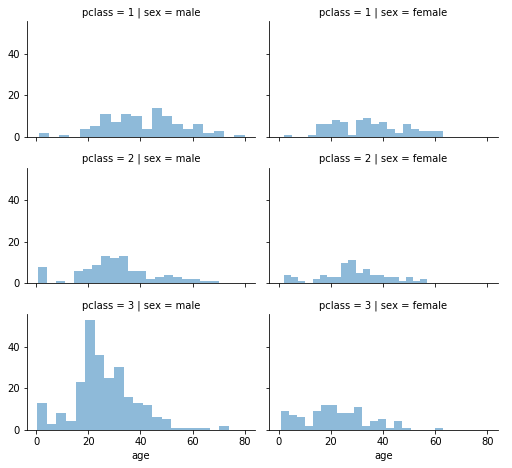

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train, row='pclass', col='sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

We need to prepare the sex column converting it in numeric. As we saw the pclass goes from 1 to 3 so there is no need to change it.

In [25]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [26]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [27]:
map_age = {
    'female': 1, 
    'male': 0
}
train['sex'] = train['sex'].map(map_age).astype(int)
test['sex'] = test['sex'].map(map_age).astype(int)

In [28]:
train['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

In [29]:
#combined[0]['sex'].value_counts()
train['sex'].value_counts()

0    577
1    314
Name: sex, dtype: int64

In [30]:
# We will get the median for each class
for i in range(0, 2): # loop for the age
    for j in range (0, 3): # Loop for the pclass
        sub_dataframe = train[(train['sex'] == i) & \
                                  (train['pclass'] == j+1)]['age'].dropna()

        median = sub_dataframe.round(1).median()

        train.loc[(train['age'].isnull()) & (train['sex'] == i) & (train['pclass'] == j+1), 'age'] = median
        
        # -------------- Do the same for the test set -----------
        
        sub_dataframe_test = test[(test['sex'] == i) & \
                                  (test['pclass'] == j+1)]['age'].dropna()

        median_test = sub_dataframe_test.round(1).median()

        test.loc[(test['age'].isnull()) & (test['sex'] == i) & (test['pclass'] == j+1), 'age'] = median_test

In [31]:
train['age'].value_counts(dropna=False)

25.00    117
21.50     42
40.00     34
30.00     34
24.00     30
        ... 
66.00      1
36.50      1
55.50      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [32]:
matrix_correlation = train.corr()
matrix_correlation['age']

passengerid    0.039033
survived      -0.059579
pclass        -0.413583
sex           -0.102706
age            1.000000
sibsp         -0.249854
parch         -0.175526
fare           0.122692
Name: age, dtype: float64

## Completing #3 - Embarked

This column only have 2 missing values, lets find whichones are.

In [33]:
train['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [34]:
embarked_mask = train['embarked'].isnull()
train[embarked_mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,NaN


In [35]:
train[train['pclass']==1]['embarked'].value_counts()

S    127
C     85
Q      2
Name: embarked, dtype: int64

In [36]:
train['embarked'].fillna('S', inplace = True)
test['embarked'].fillna('S', inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int32  
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [37]:
test['embarked'].value_counts()

S    270
C    102
Q     46
Name: embarked, dtype: int64

In [38]:
mean_fare = test['fare'].mean()
test['fare'] = test['fare'].fillna(mean_fare).astype(int)

## Correcting

We will correct the follows columns:

* Age: Rounding to 2 decimals
* Fare: Roungin to 2 decimals

In [39]:
train['fare'] = train['fare'].round(0).astype(int)
train['age'] = train['age'].round(2)

test['fare'] = test['fare'].round(0).astype(int)
test['age'] = test['age'].round(2)

## Creating

There are several columns that can be created. We will do the follow:

* Title column extracting the title from the name
* Family column using sibsp and parch
* Generations from the age

After that we will use the categorical columns to create dummies

##### Generating the title column


In [40]:
pattern = r' (\w+)\.'
train['title'] = train['name'].str.extract(pattern)
test['title'] = test['name'].str.extract(pattern)

In [41]:
train.drop(['name'], axis=1, inplace = True)
test.drop(['name'], axis=1, inplace = True)

In [42]:
# we could use a mapping technique here, but using replace is easier
train['title'] = train['title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'rare')
train['title'] = train['title'].replace('Mme', 'Mrs')
train['title'] = train['title'].replace(['Ms','Mlle'], 'Miss')

test['title'] = test['title'].replace(['Col', 'Master', 'Dr', 'Rev'], 'rare')
test['title'] = test['title'].replace(['Ms','Dona'], 'Miss')

In [43]:
group_title = train.groupby('title').mean()
group_title['survived']

title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
rare      0.347826
Name: survived, dtype: float64

**Generating the family column**

In [44]:
train['family'] = train['sibsp'] + train['parch'] + 1 
test['family'] = test['sibsp'] + test['parch'] + 1 

In [45]:
group_family = train.groupby('family').mean()
group_family['survived']

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

**Generating the generation column**

In [46]:
train['age'].value_counts()

25.00    117
21.50     42
40.00     34
30.00     34
24.00     30
        ... 
66.00      1
36.50      1
55.50      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [47]:
train['generation'] = pd.cut(train['age'], 5)
train[['generation', 'survived']].groupby(['generation'], as_index=False).mean().sort_values(by='generation', 
                                                                                             ascending=True)

,generation,survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [48]:
def generate_generation(row):
    if (row['age'] >= 0) & (row['age'] < 16):
        return 0
    
    if (row['age'] >= 16) & (row['age'] < 32):
        return 1
    
    if (row['age'] >= 32) & (row['age'] < 48):
        return 2
    
    if (row['age'] >= 48) & (row['age'] < 64):
        return 3
    
    if row['age'] >= 64:
        return 4

train['generation'] = train.apply(generate_generation, axis = 1)
test['generation'] = test.apply(generate_generation, axis = 1)

In [49]:
train['generation'].value_counts(dropna=False)

1    492
2    227
0     83
3     76
4     13
Name: generation, dtype: int64

In [50]:
test['generation'].value_counts(dropna=False)

1    251
2     91
3     39
0     32
4      5
Name: generation, dtype: int64

### Dummies generation

Title

In [51]:
for title in ['Mr', 'Mrs', 'Miss', 'Master', 'rare']:
    train[title] = 0
    train.loc[train['title'] == title, title] = 1
train.drop('title', inplace = True, axis = 1)

for title in ['Mr', 'Mrs', 'Miss', 'Master', 'rare']:
    test[title] = 0
    test.loc[test['title'] == title, title] = 1
test.drop('title', inplace = True, axis = 1)

In [52]:
train.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,family,generation,Mr,Mrs,Miss,Master,rare
0,1,0,3,0,22.0,1,0,A/5 21171,7,S,2,1,1,0,0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71,C,2,2,0,1,0,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,8,S,1,1,0,0,1,0,0
3,4,1,1,1,35.0,1,0,113803,53,S,2,2,0,1,0,0,0
4,5,0,3,0,35.0,0,0,373450,8,S,1,2,1,0,0,0,0


Embarked

In [53]:
for embarked in ['S','Q','C']:
    train[embarked] = 0
    train.loc[train['embarked'] == embarked, embarked] = 1
    
    test[embarked] = 0
    test.loc[test['embarked'] == embarked, embarked] = 1    

Drop unuse column

In [54]:
train_labels = train['survived'].copy()
train_prepared = train.drop(['survived', 'passengerid','ticket','embarked','age','sibsp','parch'], axis = 1)
test_prepared = test.drop(['passengerid','ticket','embarked','age','sibsp','parch'], axis = 1)

In [55]:
mean_fare = test_prepared['fare'].mean()
test_prepared['fare'] = test_prepared['fare'].fillna(mean_fare).astype(int)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(train_prepared)
train_prepared_scaled = pd.DataFrame(scaler.fit_transform(train_prepared), columns = train_prepared.columns)
test_prepared_scaled = pd.DataFrame(scaler.fit_transform(test_prepared), columns = test_prepared.columns)

In [57]:
train_prepared_scaled.head()

,pclass,sex,fare,family,generation,Mr,Mrs,Miss,Master,rare,S,Q,C
0,0.827377,-0.737695,-0.507684,0.059160,-0.456259,0.850532,-0.405840,-0.511898,-0.216803,-0.162781,0.615838,-0.307562,-0.482043
1,-1.566107,1.355574,0.780938,0.059160,0.757254,-1.175735,2.464027,-0.511898,-0.216803,-0.162781,-1.623803,-0.307562,2.074505
2,0.827377,1.355574,-0.487549,-0.560975,-0.456259,-1.175735,-0.405840,1.953514,-0.216803,-0.162781,0.615838,-0.307562,-0.482043
3,-1.566107,1.355574,0.418513,0.059160,0.757254,-1.175735,2.464027,-0.511898,-0.216803,-0.162781,0.615838,-0.307562,-0.482043
4,0.827377,-0.737695,-0.487549,-0.560975,0.757254,0.850532,-0.405840,-0.511898,-0.216803,-0.162781,0.615838,-0.307562,-0.482043


In [58]:
test_prepared_scaled.head()

,pclass,sex,fare,family,generation,Mr,Mrs,Miss,Master,rare,S,Q,C
0,0.873482,-0.755929,-0.505280,-0.553443,0.793666,0.861201,-0.456172,-0.486504,0.0,-0.257539,-1.350676,2.843757,-0.568142
1,0.873482,1.322876,-0.505280,0.105643,0.793666,-1.161169,2.192158,-0.486504,0.0,-0.257539,0.740370,-0.351647,-0.568142
2,-0.315819,-0.755929,-0.469424,-0.553443,2.040855,0.861201,-0.456172,-0.486504,0.0,-0.257539,-1.350676,2.843757,-0.568142
3,0.873482,-0.755929,-0.487352,-0.553443,-0.453523,0.861201,-0.456172,-0.486504,0.0,-0.257539,0.740370,-0.351647,-0.568142
4,0.873482,1.322876,-0.415641,0.764728,-0.453523,-1.161169,2.192158,-0.486504,0.0,-0.257539,0.740370,-0.351647,-0.568142


## Models and predictions

After first prediction, almoust without any value treatment, we reach a 0.44 for rmse and a 0.12 mean for the cv scores. With this terribles values, lets try a little harder with a improved pipeline:

For our model select we will use the follow:

* X = train_prepared
* y = train_labels
* X_Test = test

In [59]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [60]:
X_train = train_prepared_scaled
Y_train = train_labels
X_test = test_prepared_scaled

In [87]:
param_grid = [# try 12 (3×4) combinations of hyperparameters
            {'C': [0.1, 1, 10, 100]}]

logreg = LogisticRegression()

# grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True, n_jobs=-1)
# grid_search_logreg.fit(X_train, Y_train)

logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


83.28

In [88]:
# cvres = grid_search_logreg.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, Y_train, cv=10)
forest_scores.mean()

0.7980024968789013

In [63]:
forest_clf.base_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4580993338634608 {'max_features': 2, 'n_estimators': 3}
0.44693278824164206 {'max_features': 2, 'n_estimators': 10}
0.44442578720630077 {'max_features': 2, 'n_estimators': 30}
0.45319501976867504 {'max_features': 4, 'n_estimators': 3}
0.4507089248416252 {'max_features': 4, 'n_estimators': 10}
0.4507158883396031 {'max_features': 4, 'n_estimators': 30}
0.451946737312759 {'max_features': 6, 'n_estimators': 3}
0.43423861954941206 {'max_features': 6, 'n_estimators': 10}
0.4431811323126398 {'max_features': 6, 'n_estimators': 30}
0.4406242967505877 {'max_features': 8, 'n_estimators': 3}
0.4469819422465465 {'max_features': 8, 'n_estimators': 10}
0.44063141962054153 {'max_features': 8, 'n_estimators': 30}
0.4629788134554522 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4702097742627115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4593445617413532 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.45443296694754415 {'bootstrap': False, 'max_features': 

In [66]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, Y_train)
y_pred = svm_clf.predict(X_test)
svm_scores = cross_val_score(svm_clf, X_train, Y_train, cv=10)
svm_scores.mean()

0.8249313358302123

In [76]:
import xgboost
from sklearn.metrics import mean_squared_error
xgb_clf= xgboost.XGBClassifier(
 # learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
xgb_clf.fit(X_train, Y_train)
y_pred = xgb_clf.predict(X_test)
xgb_scores = cross_val_score(xgb_clf, X_train, Y_train, cv=10)
xgb_scores.mean()
# val_error = mean_squared_error(Y_train, Y_pred) # Not shown
# print("Validation MSE:", val_error)           # Not shown

# xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
# y_pred = xgb_reg.predict(X_val)
# val_error = mean_squared_error(y_val, y_pred)  # Not shown
# print("Validation MSE:", val_error)       

0.8193383270911362

In [68]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, Y_train)
y_pred = ada_clf.predict(X_test)
ada_scores = cross_val_score(ada_clf, X_train, Y_train, cv=10)
ada_scores.mean()

0.8294382022471909

In [ ]:
deaths_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(train_labels, deaths_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [91]:
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [92]:
deaths_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, deaths_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.28228663863600245

In [95]:
# Generate Submission File 
PassengerId = test['passengerid']
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Predictions': Y_pred })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

After doing this we can tell a base line for our models. so we can improve from here.